In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras_preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras import optimizers, losses
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1065375300895864241, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15701340352
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17554777863105116999
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [ ]:
import os, shutil
glass_dataset_dir = '/content/drive/My Drive/Colab Notebooks/datasets/재활용사진/glass'
metal_dataset_dir = '/content/drive/My Drive/Colab Notebooks/datasets/재활용사진/metal'
plastic_dataset_dir = '/content/drive/My Drive/Colab Notebooks/datasets/재활용사진/plastic'
paper_dataset_dir = '/content/drive/My Drive/Colab Notebooks/datasets/재활용사진/paper'

base_dir = '/content/drive/My Drive/Colab Notebooks/datasets/재활용사진/b_dir'
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_glass_dir = os.path.join(train_dir, 'glass')
os.mkdir(train_glass_dir)
train_metal_dir = os.path.join(train_dir, 'metal')
os.mkdir(train_metal_dir)
train_plastic_dir = os.path.join(train_dir, 'plastic')
os.mkdir(train_plastic_dir)
train_paper_dir = os.path.join(train_dir, 'paper')
os.mkdir(train_paper_dir)

validation_glass_dir = os.path.join(validation_dir, 'glass')
os.mkdir(validation_glass_dir)
validation_metal_dir = os.path.join(validation_dir, 'metal')
os.mkdir(validation_metal_dir)
validation_plastic_dir = os.path.join(validation_dir, 'plastic')
os.mkdir(validation_plastic_dir)
validation_paper_dir = os.path.join(validation_dir, 'paper')
os.mkdir(validation_paper_dir)

test_glass_dir = os.path.join(test_dir, 'glass')
os.mkdir(test_glass_dir)
test_metal_dir = os.path.join(test_dir, 'metal')
os.mkdir(test_metal_dir)
test_plastic_dir = os.path.join(test_dir, 'plastic')
os.mkdir(test_plastic_dir)
test_paper_dir = os.path.join(test_dir, 'paper')
os.mkdir(test_paper_dir)

In [ ]:
fnames = ['glass ({}).jpg'.format(i) for i in range(700)]
for fname in fnames:
    src = os.path.join(glass_dataset_dir, fname)
    dst = os.path.join(train_glass_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['metal ({}).jpg'.format(i) for i in range(700)]
for fname in fnames:
    src = os.path.join(metal_dataset_dir, fname)
    dst = os.path.join(train_metal_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['plastic ({}).jpg'.format(i) for i in range(700)]
for fname in fnames:
    src = os.path.join(plastic_dataset_dir, fname)
    dst = os.path.join(train_plastic_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['paper ({}).jpg'.format(i) for i in range(700)]
for fname in fnames:
    src = os.path.join(paper_dataset_dir, fname)
    dst = os.path.join(train_paper_dir, fname)
    shutil.copyfile(src, dst)

print('훈련용 유리병 이미지 전체 개수:', len(os.listdir(train_glass_dir)))
print('훈련용 캔 이미지 전체 개수:', len(os.listdir(train_metal_dir)))
print('훈련용 페트 이미지 전체 개수:', len(os.listdir(train_plastic_dir)))
#print('훈련용 종이 이미지 전체 개수:', len(os.listdir(train_paper_dir)))

훈련용 유리병 이미지 전체 개수: 700
훈련용 캔 이미지 전체 개수: 700
훈련용 페트 이미지 전체 개수: 700


In [ ]:
import os, shutil
fnames = ['glass ({}).jpg'.format(i) for i in range(700,800)]
for fname in fnames:
    src = os.path.join(glass_dataset_dir, fname)
    dst = os.path.join(validation_glass_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['metal ({}).jpg'.format(i) for i in range(700,800)]
for fname in fnames:
    src = os.path.join(metal_dataset_dir, fname)
    dst = os.path.join(validation_metal_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['plastic ({}).jpg'.format(i) for i in range(700,800)]
for fname in fnames:
    src = os.path.join(plastic_dataset_dir, fname)
    dst = os.path.join(validation_plastic_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['paper ({}).jpg'.format(i) for i in range(700,800)]
for fname in fnames:
    src = os.path.join(paper_dataset_dir, fname)
    dst = os.path.join(validation_paper_dir, fname)
    shutil.copyfile(src, dst)

print('검증용 유리병 이미지 전체 개수:', len(os.listdir(validation_glass_dir)))
print('검증용 캔 이미지 전체 개수:', len(os.listdir(validation_metal_dir)))
print('검증용 페트 이미지 전체 개수:', len(os.listdir(validation_plastic_dir)))
#print('검증용 종이 이미지 전체 개수:', len(os.listdir(validation_paper_dir)))

검증용 유리병 이미지 전체 개수: 100
검증용 캔 이미지 전체 개수: 100
검증용 페트 이미지 전체 개수: 100


In [ ]:
fnames = ['glass ({}).jpg'.format(i) for i in range(800,900)]
for fname in fnames:
    src = os.path.join(glass_dataset_dir, fname)
    dst = os.path.join(test_glass_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['metal ({}).jpg'.format(i) for i in range(800,900)]
for fname in fnames:
    src = os.path.join(metal_dataset_dir, fname)
    dst = os.path.join(test_metal_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['plastic ({}).jpg'.format(i) for i in range(800,900)]
for fname in fnames:
    src = os.path.join(plastic_dataset_dir, fname)
    dst = os.path.join(test_plastic_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['paper ({}).jpg'.format(i) for i in range(800,900)]
for fname in fnames:
    src = os.path.join(paper_dataset_dir, fname)
    dst = os.path.join(test_paper_dir, fname)
    shutil.copyfile(src, dst)

print('테스트용 유리병 이미지 전체 개수:', len(os.listdir(test_glass_dir)))
print('테스트용 캔 이미지 전체 개수:', len(os.listdir(test_metal_dir)))
print('테스트용 페트 이미지 전체 개수:', len(os.listdir(test_plastic_dir)))
#print('테스트용 종이 이미지 전체 개수:', len(os.listdir(test_paper_dir)))

테스트용 유리병 이미지 전체 개수: 100
테스트용 캔 이미지 전체 개수: 100
테스트용 페트 이미지 전체 개수: 100


In [ ]:
# Part 1 - Building the CNN 
# Importing the Keras libraries and packages 
from keras.models import Sequential 
from keras.layers import Conv2D 
from keras.layers import MaxPooling2D 
from keras.layers import Flatten 
from keras.layers import Dense
from keras import layers
from keras.layers import Dropout
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import *
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedKFold

#opt = keras.optimizers.Adam(lr=0.01)

In [ ]:
"""
model = Sequential()

model.add(Conv2D(64, (3, 3),
                 input_shape = (150, 150, 3),
                  activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))     

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 4, activation = 'softmax')) # 출력은 4개

model.compile(optimizer = 'RMprop', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])
"""

"\nmodel = Sequential()\n\nmodel.add(Conv2D(64, (3, 3),\n                 input_shape = (150, 150, 3),\n                  activation = 'relu'))\nmodel.add(MaxPooling2D(pool_size = (2, 2)))\n\nmodel.add(Conv2D(64, (3, 3), activation = 'relu'))\nmodel.add(MaxPooling2D(pool_size = (2, 2)))\n\nmodel.add(Conv2D(128, (3, 3), activation = 'relu'))\nmodel.add(MaxPooling2D(pool_size = (2, 2)))     \n\nmodel.add(Flatten())\nmodel.add(Dropout(0.2))\n\nmodel.add(Dense(units = 128, activation = 'relu'))\nmodel.add(Dense(units = 4, activation = 'softmax')) # 출력은 4개\n\nmodel.compile(optimizer = 'RMprop', \n              loss = 'categorical_crossentropy', \n              metrics = ['acc'])\n"

In [ ]:
# model.summary()

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import seaborn as sns
import tensorflow

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, SGD, Adam, Nadam
from tensorflow.keras.regularizers import l1, l2, L1L2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

np.random.seed(0)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 20,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        horizontal_flip = True,
        vertical_flip = True,
        fill_mode='nearest'
)


test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/datasets/재활용사진/b_dir/train',
                                                 target_size = (150, 150),
                                                 batch_size = 20,
                                                 class_mode = 'categorical',
                                                 shuffle=False,)

validation_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/datasets/재활용사진/b_dir/validation',
                                                  target_size = (150, 150),
                                                  batch_size = 20,
                                                  class_mode = 'categorical',
                                                  shuffle=False,)

Found 2800 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [ ]:
vgg = VGG16(weights = 'imagenet',
              include_top = False,
              input_shape = (150,150,3)) # VGG16

for layer in vgg.layers[:-3]:
    layer.trainable = False

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
model = Sequential() 
model.add(vgg)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              8389632   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 4100      
Total params: 23,108,420
Trainable params: 13,113,348
Non-trainable params: 9,995,072
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Nadam(lr=1e-4),
              metrics=['acc'])

In [ ]:
# 과적합 발생시 조기 종료 후 체크 포인트
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('VGG16 Garbage Classifier.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

history = model.fit_generator(
    training_set,
    steps_per_epoch=140,
    epochs=30,
    validation_data=validation_set,
    validation_steps=20,
    verbose=0,
    callbacks = [es, mc],)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '



Epoch 00001: val_acc improved from -inf to 0.55750, saving model to VGG16 Garbage Classifier.h5

Epoch 00002: val_acc improved from 0.55750 to 0.67750, saving model to VGG16 Garbage Classifier.h5

Epoch 00003: val_acc improved from 0.67750 to 0.73250, saving model to VGG16 Garbage Classifier.h5

Epoch 00004: val_acc did not improve from 0.73250

Epoch 00005: val_acc improved from 0.73250 to 0.75500, saving model to VGG16 Garbage Classifier.h5

Epoch 00006: val_acc did not improve from 0.75500

Epoch 00007: val_acc did not improve from 0.75500

Epoch 00008: val_acc did not improve from 0.75500

Epoch 00009: val_acc improved from 0.75500 to 0.78250, saving model to VGG16 Garbage Classifier.h5

Epoch 00010: val_acc improved from 0.78250 to 0.79000, saving model to VGG16 Garbage Classifier.h5

Epoch 00011: val_acc did not improve from 0.79000

Epoch 00012: val_acc did not improve from 0.79000

Epoch 00013: val_acc did not improve from 0.79000

Epoch 00014: val_acc did not improve from 0.7

In [ ]:
history = model.fit_generator(training_set,
                              steps_per_epoch = 140,
                              epochs = 30,
                              validation_data = validation_set,
                              validation_steps = 20)

Epoch 1/30


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


140/140 [==============================] - 24s 172ms/step - loss: 0.1663 - acc: 0.9382 - val_loss: 0.9309 - val_acc: 0.7750
Epoch 2/30
140/140 [==============================] - 25s 180ms/step - loss: 0.1842 - acc: 0.9354 - val_loss: 0.6912 - val_acc: 0.8250
Epoch 3/30
140/140 [==============================] - 24s 172ms/step - loss: 0.1484 - acc: 0.9486 - val_loss: 0.9008 - val_acc: 0.8200
Epoch 4/30
140/140 [==============================] - 25s 178ms/step - loss: 0.1448 - acc: 0.9482 - val_loss: 0.7855 - val_acc: 0.8150
Epoch 5/30
140/140 [==============================] - 25s 177ms/step - loss: 0.1487 - acc: 0.9486 - val_loss: 0.9480 - val_acc: 0.8100
Epoch 6/30
140/140 [==============================] - 26s 183ms/step - loss: 0.1250 - acc: 0.9564 - val_loss: 0.7400 - val_acc: 0.8250
Epoch 7/30
140/140 [==============================] - 25s 179ms/step - loss: 0.1168 - acc: 0.9596 - val_loss: 1.0690 - val_acc: 0.8150
Epoch 8/30
140/140 [==============================] - 25s 177ms/st

In [ ]:
from google.colab import files
model.save('File_name_2.h5') # 저장
files.download('File_name_2.h5') # 다운로드

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

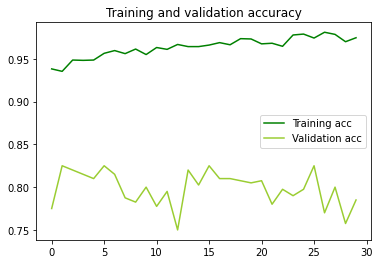

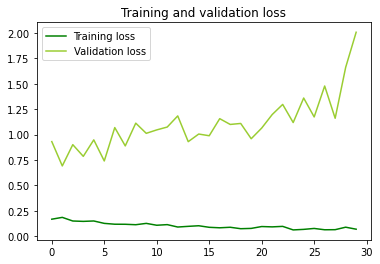

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label = 'Training acc')
plt.plot(epochs, val_acc, 'yellowgreen', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label = 'Training loss')
plt.plot(epochs, val_loss, 'yellowgreen', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

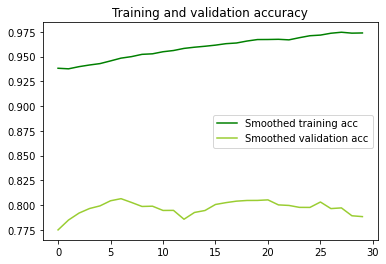

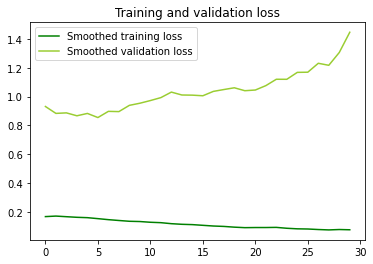

In [ ]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'g', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'yellowgreen', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'g', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'yellowgreen', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()


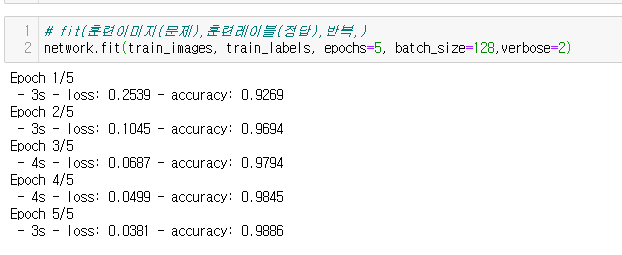

In [ ]:
labels = ['glass','metal','plastic','paper']

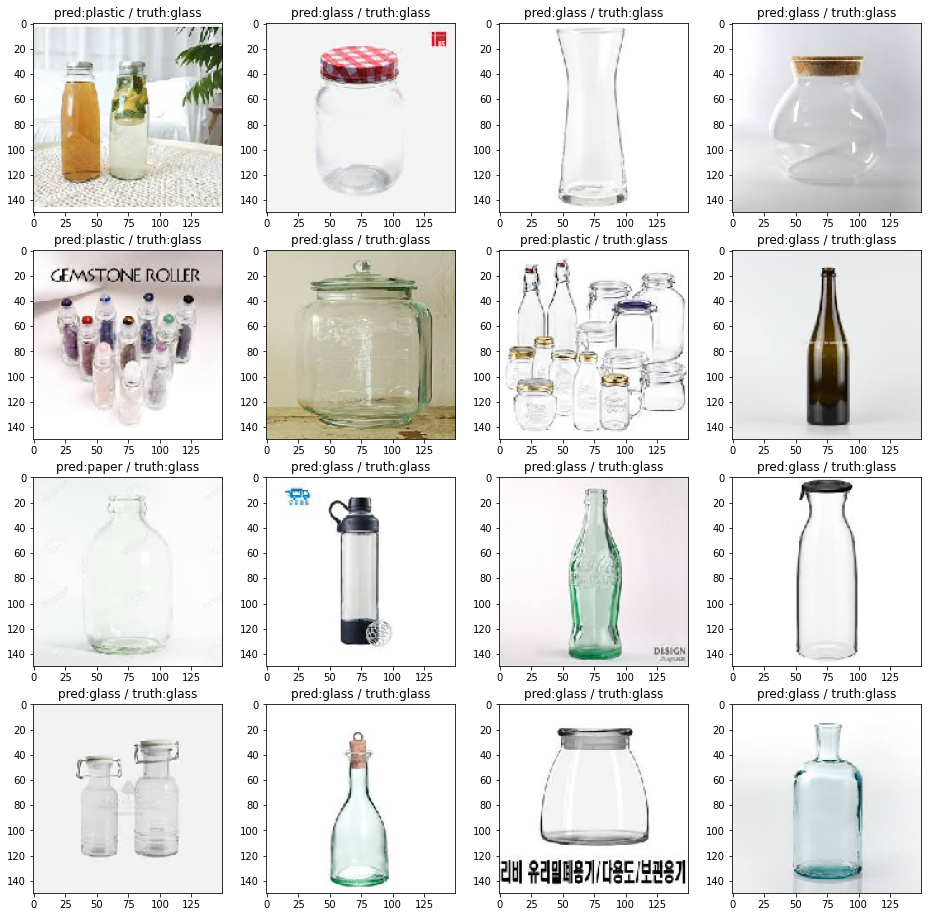

In [ ]:
test_x, test_y = validation_set.__getitem__(1)

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])